In [25]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from stable_baselines3 import PPO

In [27]:
model = PPO.load('../best_model/ppo/MlpPolicy/best_model.zip')
X = np.load('../best_model/ppo/MlpPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([861, 1, 7])

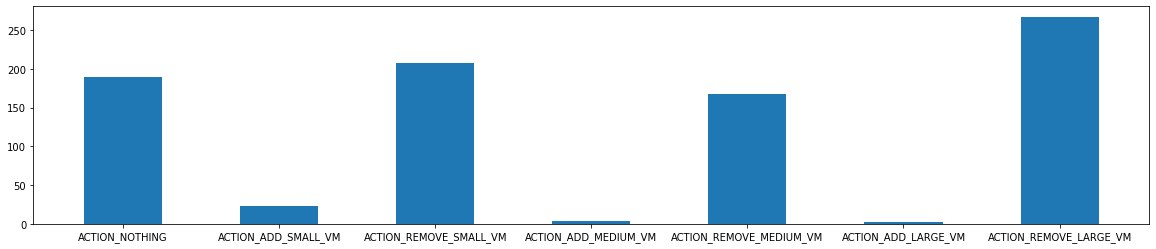

In [29]:
plot_action_histogram(model, X)

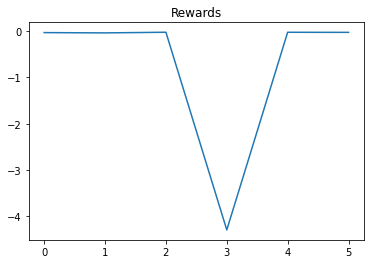

In [30]:
plot_rewards('../best_model/ppo/MlpPolicy/best_model_rewards.csv')

In [31]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [32]:
x = torch.tensor(X[0])
ppo_net.forward(x)

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[-0.3320]], grad_fn=<AddmmBackward0>)

In [33]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample)

/Users/amalota/Documents/trainloop-driver/analysis/src/attribute.py:130: RuntimeWarning: invalid value encountered in true_divide
  n_steps=self.n_steps,


In [34]:
# plot_mean_attributions(mean_attributions=mean_attributions)

Action made: ACTION_REMOVE_MEDIUM_VM


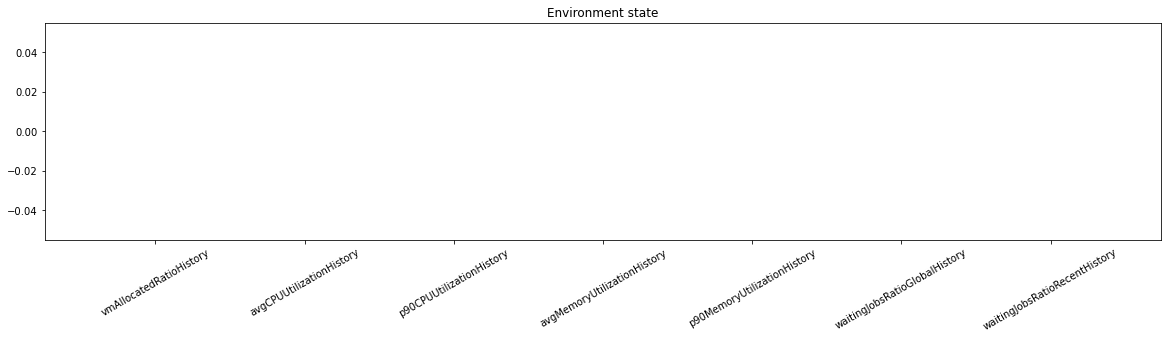

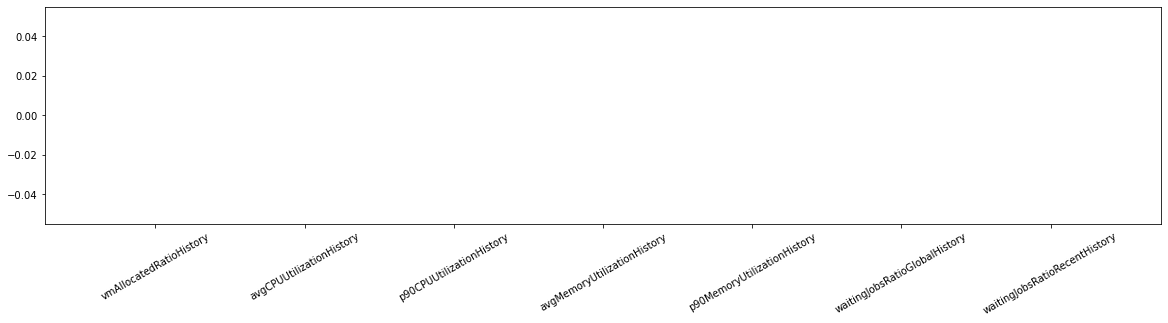

In [35]:
ig_attributor.explain_example(idx=4)

Action made: ACTION_REMOVE_SMALL_VM


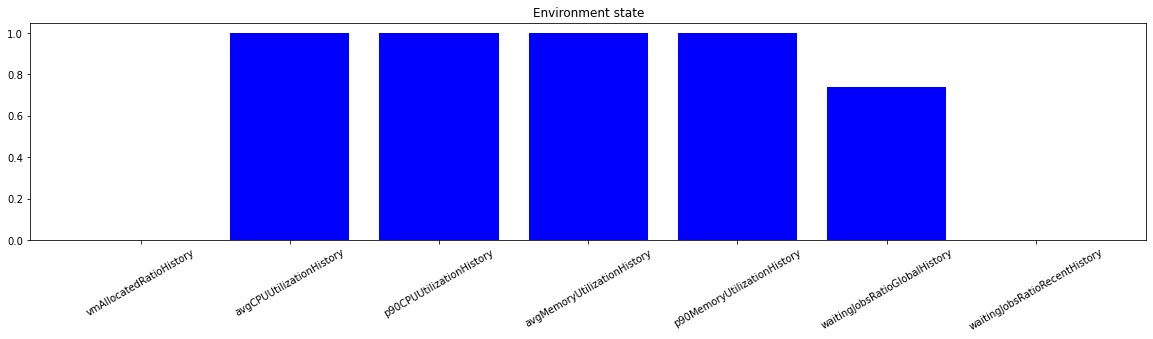

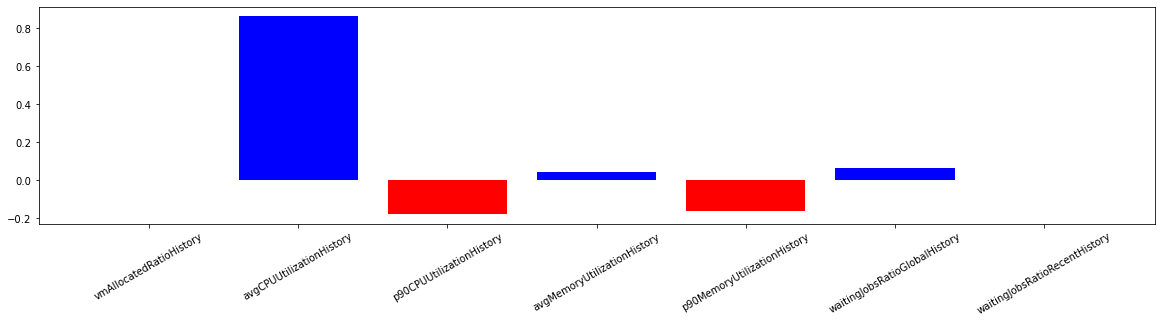

In [16]:
ig_attributor.explain_example(idx=48)

In [36]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])

In [38]:
X_manual.shape

torch.Size([3, 1, 7])

In [39]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_manual)

Action made: ACTION_NOTHING


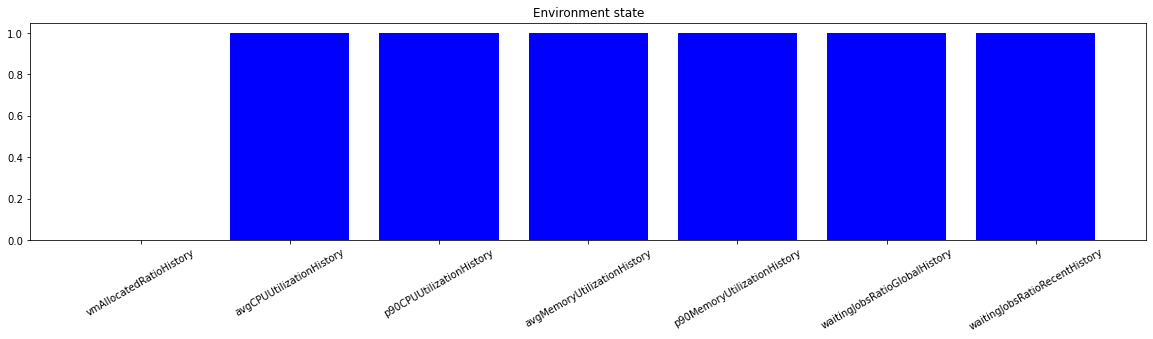

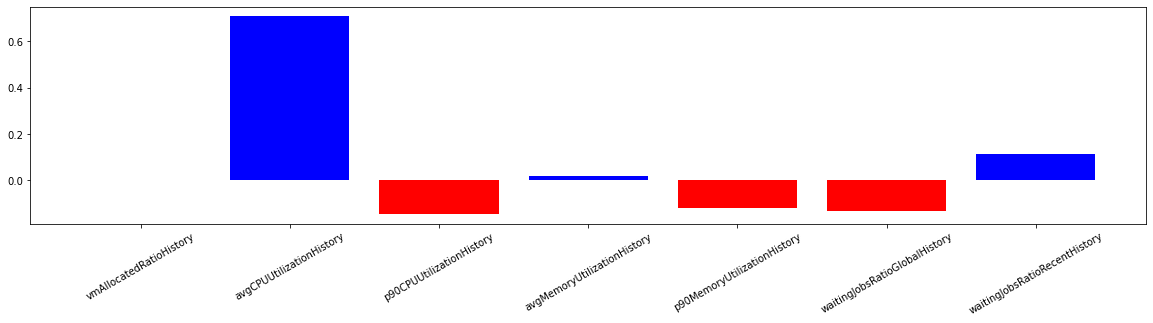

In [40]:
ig_attributor.explain_example(idx=0)